# Grab Algorithm
- 需要用户手动画出矩形框
- 迭代
- 用户有手动修改的余地（标记哪些地方是前景错分为后景，反之亦然！），然后算法继续迭代修正
## 算法简述
- 矩形框外的事物被认定为“确定的”背景，or to say “hard labelling”
- 给前景、背景打上标签（label）
- 高斯混合模型来给前景、背景建模
- 高斯混合模型给矩形框内的像素打上标签（概率）
- 建图
    - 前景都和“源点（source node）”连接，边的权重是该像素为前景的概率
    - 背景都和“汇点（sink node）”连接，边的权重是该像素为背景的概率
    - 像素点之间的边的权重由边缘信息（edge information）和像素点之间的相似度决定
 
 
 - 最小割算法（mincut algorithm）用来切分图，使得损失函数最小，**损失函数**是指切割的边的权重之和
 - 迭代直到收敛
 
 <img src="https://docs.opencv.org/3.4.3/grabcut_scheme.jpg">
 

cv.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, mode)

- img - 输入图片（3通道彩色图）
- mask - 我们人工指定的哪部分是背景，哪部分是前景、背景
- rect - 人工标定的区域(x, y, w, h)
- bgdModel, fgdModel - 直接传入np.float64的size为(1, 65)的array即可
- iterCount - 迭代次数
- mode - cv.GC_INIT_WITH_RECT用于矩形框模式；cv.GC_INIT_WITH_MASK用于使用mask修订模式

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

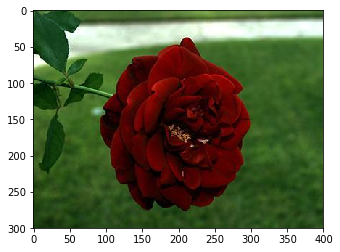

In [3]:
img = cv.imread("./30002.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, 250, 250)

In [9]:
mask, bgdModel, fgdModel = cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

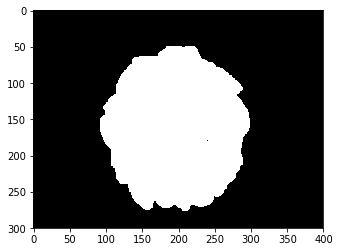

In [10]:
"""新的mask中包含前景、背景、预测前景、预测背景的信息，这四种label由：
    GC_BGD, GC_FGD, GC_PR_BGD, GC_PR_FGD指明"""
"""将mask中的background全部置为0，foreground置为1"""
mask2 = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD), 0, 1).astype(np.uint8)
plt.imshow(mask2, cmap="gray")

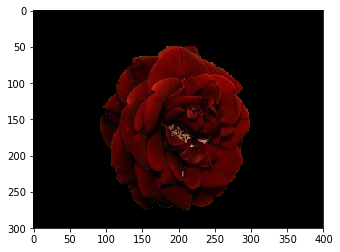

In [11]:
new_img = img * mask2[:, :, np.newaxis]
plt.imshow(new_img.astype(np.uint8))